In [1]:
import pandas as pd
import numpy as np

In [25]:
name="Event1"
df=pd.read_csv("//Users/Bernardo/Downloads/"+name+".csv")

In [26]:
df=df.set_index("bee")


In [27]:
colsin=df.index
colsin2=[]
for col in colsin:
    try:
        a=int(col)
        colsin2.append(col)
    except: pass


In [28]:
df.loc[colsin2]=df.loc[colsin2]!="0"


In [29]:
colsin=list(colsin)
#colsin.remove(np.nan)

In [30]:
while np.nan in colsin : colsin.remove(np.nan)

In [31]:
df=df.loc[colsin]

In [32]:
df.columns

Index(['X15', 'X16', 'X17', 'X18', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X19', 'X20', 'X21', 'X22'],
      dtype='object')

In [33]:
df.columns

Index(['X15', 'X16', 'X17', 'X18', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X19', 'X20', 'X21', 'X22'],
      dtype='object')

In [34]:
list(df.loc["Abbreviation"])

['M',
 'M',
 'M',
 'M',
 'VQ',
 'VQ',
 'VQ',
 'VQ',
 'VQ',
 'VQ',
 'VQ',
 'VQ',
 'W',
 'W',
 'W',
 'W']

In [35]:
col1=[]
col2=[]
for c, s in zip(df.loc["Abbreviation"], list(df.columns)):
    if c=="VQ": 
        col1.append(s)
    else: col2.append(s)

In [36]:
%run /Users/Bernardo/Dropbox/libreriaBGBB.py

In [37]:
listaregs=[]
ovals=[]
for k in df.iterrows():
    if k[0] in colsin2:
        vals1=[k[1][c] for c in col1]
        vals2=[k[1][c] for c in col2]
        allvals=vals1+vals2
        xs=[1 for i in col1]+[0 for i in col2]
        nl=[]
        for a, b in zip(allvals, xs):
            nd={"Y":a, "Constant":1, "Queen":b}
            nl.append(nd)
        dfaux=pd.DataFrame(nl)
        pkval=np.nan
        if (np.mean(allvals)!=0) & (np.mean(allvals)!=1): 
            r=OLS( dfaux["Y"],dfaux[["Constant", "Queen"]]).fit()
            if r.pvalues["Queen"]<0.01:
                listaregs=savereg(listaregs, r, name="OLS", depvar="chem"+str(k[0]))
            pkval=r.pvalues["Queen"]
    else: pkval=np.nan
    ovals.append(pkval)

/Users/Bernardo/miniconda3/lib/python3.7/site-packages/linearmodels/iv/results.py:232: RuntimeWarning: invalid value encountered in sqrt
  std_errors = sqrt(diag(self.cov))


In [38]:
printregs(listaregs )

|.|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|OLS|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|<b>Dependent variable|<b>chem1|<b>chem20|<b>chem42|<b>chem68|<b>chem76|<b>chem78|<b>chem79|<b>chem103|<b>chem113|<b>chem162|<b>chem168|<b>chem197|<b>chem235|<b>chem252|<b>chem321|<b>chem330|<b>chem390|<b>chem398|<b>chem407|<b>chem409|<b>chem482|<b>chem581|<b>chem812|<b>chem827|<b>chem890|<b>chem891|<b>chem893|<b>chem902|<b>chem908|<b>chem909|<b>chem969|
|Constant|0.25|0.125|0.0|0.875***|0.0|0.0|0.875***|0.0|0.0|0.0|0.0|0.125|0.625***|0.625***|0.75***|0.5**|0.125|0.0|0.0|0.0|0.0|0.5**|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|
|SE|(0.153)|(0.117)|(0.0)|(0.117)|(0.0)|-|(0.117)|(0.0)|(0.0)|(0.0)|(0.0)|(0.117)|(0.171)|(0.171)|(0.153)|(0.177)|(0.117)|(0.0)|(0.0)|(0.0)|(0.0)|(0.177)|-|(0.0)|(0.0)|-|(0.0)|-|(0.0)|-|(0.0)|
|Queen|0.625**|0.625**|0.5**|-0.625**|0.5**|0.625***|-0.625**|0.5**|0.5**|0.5**|0.5**|0.625**|-0.625***|-0.625***|-0.75***|-0.5**|0.625**|0.5**|0.5**|0.5**|0.5**|-0.5**|0.625***|0.5**|0.5**|0.625***|0.5**|0.625***|0.5**|0.625***|0.5**|
|SE|(0.193)|(0.193)|(0.177)|(0.193)|(0.177)|(0.171)|(0.193)|(0.177)|(0.177)|(0.177)|(0.177)|(0.193)|(0.171)|(0.171)|(0.153)|(0.177)|(0.193)|(0.177)|(0.177)|(0.177)|(0.177)|(0.177)|(0.171)|(0.177)|(0.177)|(0.171)|(0.177)|(0.171)|(0.177)|(0.171)|(0.177)|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|<b> rsq|0.397|0.397|0.333|0.397|0.333|0.455|0.397|0.333|0.333|0.333|0.333|0.397|0.455|0.455|0.6|0.333|0.397|0.333|0.333|0.333|0.333|0.333|0.455|0.333|0.333|0.455|0.333|0.455|0.333|0.455|0.333|
|<b> N|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|16|

In [39]:
df["pvals"]=ovals

In [40]:
df.to_csv("withpvals.csv")
df=df.drop("pvals", axis=1)

In [41]:
import seaborn as sns

In [42]:
allcols=list(df.columns)
nm=[]
for bee in allcols:
    nl=[]
    for bee2 in allcols:
        if bee==bee2:
            sim=1
        else:
            suma=np.sum([int(k>0) for k in df[bee][colsin2]+df[bee2][colsin2]])
            inter=np.sum([int(k>0) for k in df[bee][colsin2]*df[bee2][colsin2]])
            sim=inter/suma
        nl.append(sim)
    nm.append(nl)
            

In [43]:
newnames={}

for col, lab in zip(df.columns, df.loc["New label"]):
    newnames[col]=lab

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

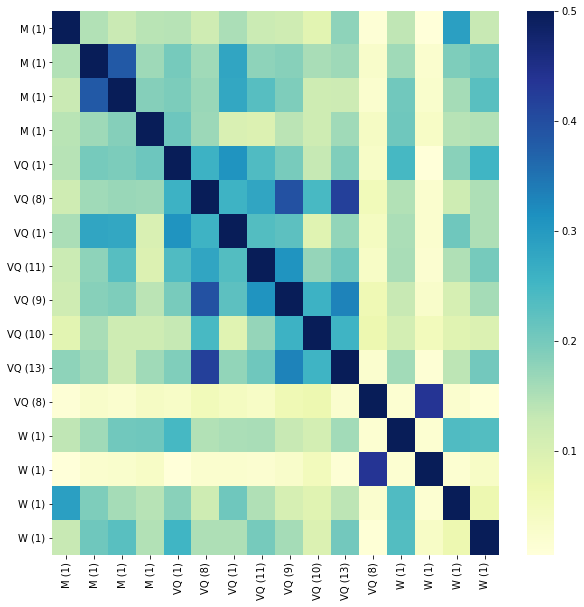

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(nm, yticklabels=[newnames[i] for i in allcols], xticklabels=[newnames[i] for i in allcols], cmap="YlGnBu", vmax=0.5)
plt.savefig("Newlabels"+name+".pdf")


In [46]:
neworder=[allcols[0]]
while len(neworder)<len(allcols):
    maxi=-1
    gan=""
    for a in allcols:
        if a not in neworder:
            for p in neworder:
                r = nm[allcols.index(a)][allcols.index(p)]
                if maxi<r: 
                    maxi=r
                    gan=a
    neworder.append(gan)
    
nm2=[]
for k in neworder:
    nl2=[]
    for s in neworder:
        nl2.append(nm[allcols.index(k)][allcols.index(s)])
    nm2.append(nl2)

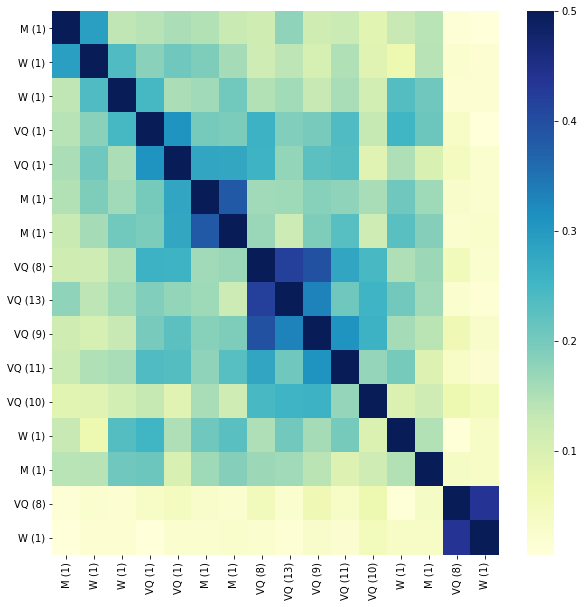

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(nm2, yticklabels=[newnames[i] for i in neworder], xticklabels=[newnames[i] for i in neworder], cmap="YlGnBu", vmax=0.5)
plt.savefig("newlabelsneworder"+name+".pdf")

plt.show()


In [91]:
from sklearn.decomposition import PCA

In [92]:
pp=PCA()

In [93]:
import random

In [94]:
dfaux=df2[df2["Sample event"]=="1"]

pp.fit(dfaux[colsin2])
xs=[p[0] for p in pp.components_]
ys=[p[1] for p in pp.components_]
for lab in ["Age (days)",  "Colony", "Abbreviation", "analysis"]:
    allvals=dfaux[lab]
    befores={}
    for xx, yy, zz in zip(xs, ys, allvals):
        if zz in befores:
            plt.scatter([xx], [yy], color=befores[zz])
        else:
            color=(random.random(), random.random(), random.random())
            befores[zz]=color
            plt.scatter([xx], [yy], color=befores[zz], label=zz)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title("By "+lab)
    plt.xlabel("C1")
    plt.ylabel("C2")
    plt.show()

KeyError: 'Sample event'

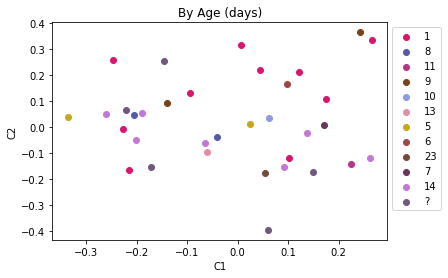

KeyError: 'Sample event'

In [95]:
pp.fit(df.loc[colsin2])
xs=[p[0] for p in pp.components_]
ys=[p[1] for p in pp.components_]
for lab in ["Age (days)", "Sample event", "Colony", "Abbreviation", "analysis"]:
    allvals=df.loc[lab]
    befores={}
    for xx, yy, zz in zip(xs, ys, allvals):
        if zz in befores:
            plt.scatter([xx], [yy], color=befores[zz])
        else:
            color=(random.random(), random.random(), random.random())
            befores[zz]=color
            plt.scatter([xx], [yy], color=befores[zz], label=zz)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title("By "+lab)
    plt.xlabel("C1")
    plt.ylabel("C2")
    plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

In [96]:
df2=df.transpose()

In [97]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Abbreviation


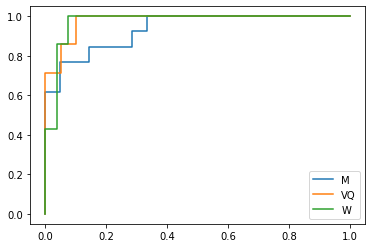

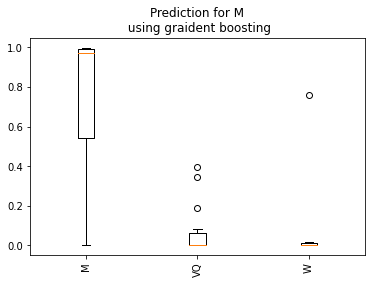

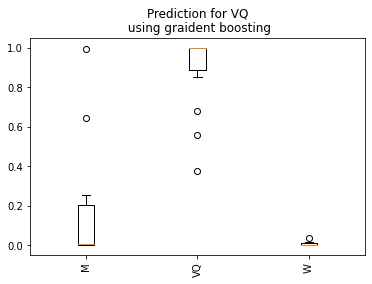

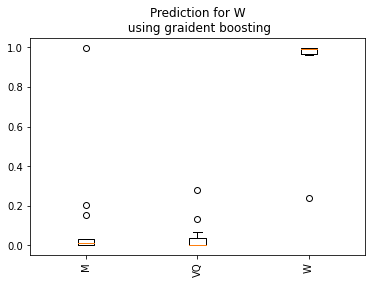

In [58]:
xs=[p[0] for p in pp.components_]
ys=[p[1] for p in pp.components_]
for lab in ["Abbreviation"]:
    print(lab)
    gbc=GradientBoostingClassifier()
    values=sorted(list(set( df2[lab])))
    i=0
    nval={}
    for v in values:
        nval[v]=i
        i+=1
    df2["aux"]=[nval[v] for v in df2[lab]]
    df2["predictions_"+lab]=[i for i in cross_val_predict(gbc, df2[colsin2], df2["aux"], cv=LeaveOneOut(), method="predict_proba")]
    for i in range(len(values)):
        fpr, tpr, _ = roc_curve([k==i for k in  df2["aux"]], [k[i] for k in df2["predictions_"+lab]])
        plt.plot(fpr, tpr, label=values[i])
    plt.legend()
    plt.show()
    
    for i in range(len(values)):
        for j in range(len(values)):
            x=[k[i] for k in df2[df2.aux==j]["predictions_"+lab]]
            plt.boxplot(x, positions=[j])
        
        plt.title("Prediction for "+values[i]+"\n using graident boosting")
        plt.xticks(range(len(values)), [v for v in values], rotation=90)
        
       
        plt.savefig("Prediction"+values[i]+".pdf")
        plt.show()
    
    
    

    

Abbreviation


/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/skl

/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/skl

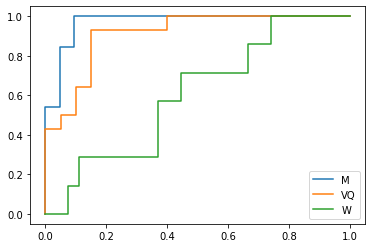

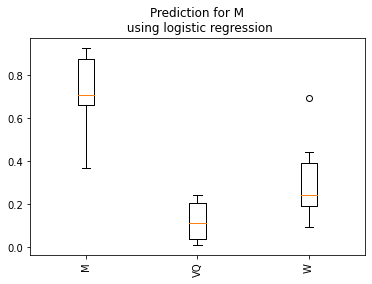

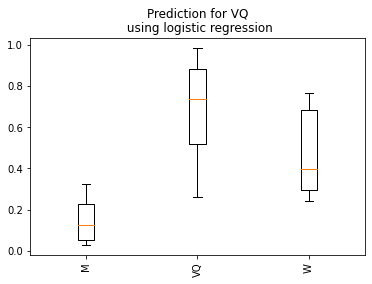

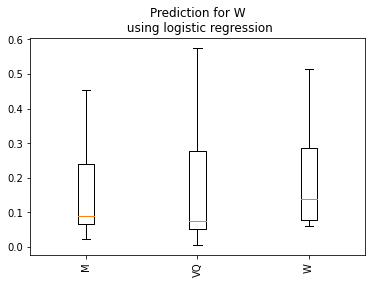

In [57]:
xs=[p[0] for p in pp.components_]
ys=[p[1] for p in pp.components_]
for lab in ["Abbreviation"]:
    print(lab)
    gbc=LogisticRegression()
    values=sorted(list(set( df2[lab])))
    i=0
    nval={}
    for v in values:
        nval[v]=i
        i+=1
    df2["aux"]=[nval[v] for v in df2[lab]]
    df2["predictions_"+lab]=[i for i in cross_val_predict(gbc, df2[colsin2], df2["aux"], cv=LeaveOneOut(), method="predict_proba")]
    for i in range(len(values)):
        fpr, tpr, _ = roc_curve([k==i for k in  df2["aux"]], [k[i] for k in df2["predictions_"+lab]])
        plt.plot(fpr, tpr, label=values[i])
    plt.legend()
    plt.show()
    
    for i in range(len(values)):
        for j in range(len(values)):
            x=[k[i] for k in df2[df2.aux==j]["predictions_"+lab]]
            plt.boxplot(x, positions=[j])
        
        plt.title("Prediction for "+values[i]+"\n using logistic regression")
        plt.xticks(range(len(values)), [v for v in values], rotation=90)
        
       
        plt.savefig("Prediction"+values[i]+"_lr.pdf")
        plt.show()
    
    
    

    

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Sample event


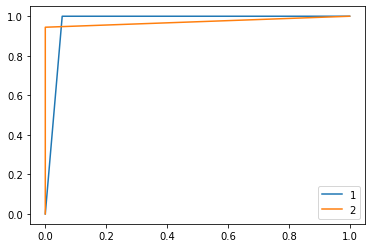

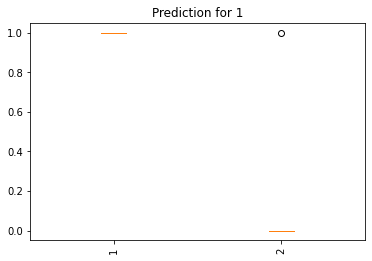

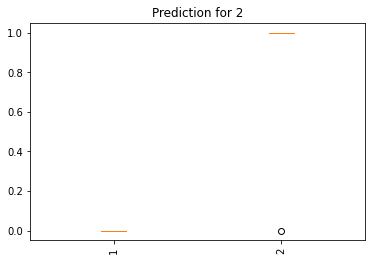

Abbreviation


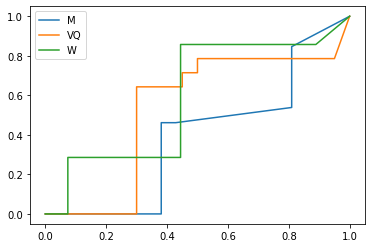

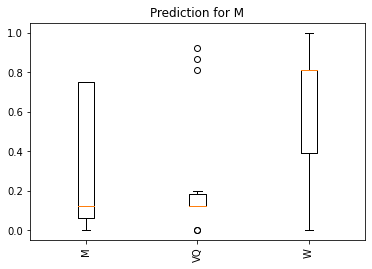

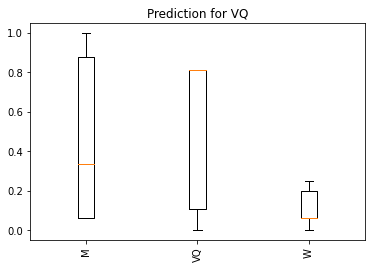

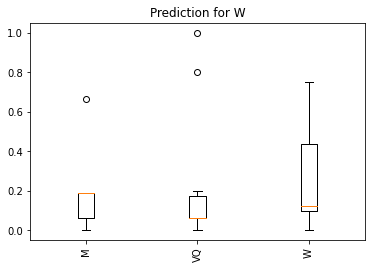

In [182]:
xs=[p[0] for p in pp.components_]
ys=[p[1] for p in pp.components_]
for lab in [ "Sample event", "Abbreviation"]:
    print(lab)
    gbc=DecisionTreeClassifier(max_depth=3)
    values=sorted(list(set( df2[lab])))
    i=0
    nval={}
    for v in values:
        nval[v]=i
        i+=1
    df2["aux"]=[nval[v] for v in df2[lab]]
    df2["predictions_"+lab]=[i for i in cross_val_predict(gbc, df2[colsin2], df2["aux"], cv=LeaveOneOut(), method="predict_proba")]
    for i in range(len(values)):
        fpr, tpr, _ = roc_curve([k==i for k in  df2["aux"]], [k[i] for k in df2["predictions_"+lab]])
        plt.plot(fpr, tpr, label=values[i])
    plt.legend()
    plt.show()
    
    for i in range(len(values)):
        for j in range(len(values)):
            x=[k[i] for k in df2[df2.aux==j]["predictions_"+lab]]
            plt.boxplot(x, positions=[j])
        
        plt.title("Prediction for "+values[i])
        plt.xticks(range(len(values)), [v for v in values], rotation=90)
        
        plt.show()
    
    
    

    

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1df6add0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1df69650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1df6a950>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1df69ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1df5b350>],
 'means': []}

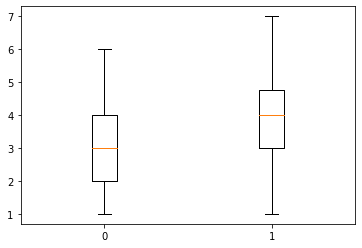

In [168]:
plt.boxplot( [1,2,3,2,1,2,3,3,4,5,6,4,4,2,2,3,4,1], positions=[0])

plt.boxplot( [4,2,3,2,4,2,5,3,4,5,6,4,4,6,7,3,4,1], positions=[1])

In [145]:
cross_val_predict(gbc, df2[colsin2], df2[lab], cv=LeaveOneOut(), method="predict_proba")

array([[9.99691131e-01, 3.08868855e-04],
       [9.99691131e-01, 3.08868855e-04],
       [9.99691131e-01, 3.08868855e-04],
       [9.99691131e-01, 3.08868855e-04],
       [9.99417347e-01, 5.82652558e-04],
       [9.99617993e-01, 3.82007298e-04],
       [9.99691131e-01, 3.08868855e-04],
       [9.99184172e-01, 8.15827674e-04],
       [2.32888689e-04, 9.99767111e-01],
       [2.32888689e-04, 9.99767111e-01],
       [2.32888689e-04, 9.99767111e-01],
       [2.32888689e-04, 9.99767111e-01],
       [2.32888689e-04, 9.99767111e-01],
       [2.32888689e-04, 9.99767111e-01],
       [9.99275750e-01, 7.24250177e-04],
       [9.99691131e-01, 3.08868855e-04],
       [9.99691131e-01, 3.08868855e-04],
       [9.97299096e-01, 2.70090393e-03],
       [9.99691131e-01, 3.08868855e-04],
       [9.98681496e-01, 1.31850425e-03],
       [9.99691131e-01, 3.08868855e-04],
       [9.99691131e-01, 3.08868855e-04],
       [2.32888689e-04, 9.99767111e-01],
       [2.32888689e-04, 9.99767111e-01],
       [2.328886

In [168]:
2

2

In [151]:
x2=[-5, 0, 2, 3]
ys=[-10, 3, 11, 14]

In [ ]:
from matplotlib.pyplo

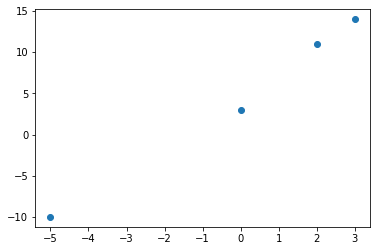

In [153]:
plt.scatter(x2, ys)

In [154]:
np.cov(x2, ys)

array([[ 12.66666667,  38.        ],
       [ 38.        , 115.        ]])

In [158]:
38./12.66666667

2.999999999210526

In [165]:
np.mean([x - y for x, y in zip(x2, ys)])

4.5

In [167]:
[38*x - y for x, y in zip(x2, ys)]

[-180, -3, 65, 100]

In [102]:
col1

['Queen0',
 'Queen8',
 'Queen0.1',
 'Queen11',
 'Queen9',
 'Queen10',
 'Queen13 ',
 'Queen8.1',
 'Queen5',
 'Queen6',
 'Queen23',
 'Queen9.1',
 'Queen5.1',
 'Queen7']

In [104]:
sorted(col2)

['Male0',
 'Male0.1',
 'Male0.2',
 'Male0.3',
 'Male14',
 'Male14.1',
 'Male14.2',
 'Male14.3',
 'Worker0',
 'Worker0.1',
 'Worker0.2',
 'Worker0.3',
 'Worker14',
 'Worker14.1',
 'Worker14.2',
 'Worker14.3']

In [2]:
import json

In [11]:
with open("/Users/Bernardo/amazon_USA/datajobs.txt", "r") as fil:
    df=json.load(fil)

In [12]:
len(df["Jobs"])

727

In [13]:
ids=[]
for j in df["Jobs"]:
    if (j["State"])=="WAITING":
        ids.append(str(j["Id"]))

In [14]:
with open("/Users/Bernardo/amazon_USA/datajobsids.txt", "w") as fil:
    fil.write("\n".join(ids))